**日本生命、契約書保全 BPO**  
  
運転免許証、[ <span style="color: red; ">20xx年(令和xx年)xx月xx日まで有効 </span>] 認識テスト  

In [1]:
from PIL import Image
import pyocr
import numpy as np
import cv2

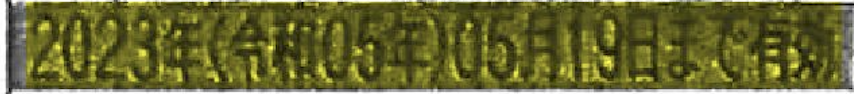

In [2]:
img = Image.open('./resources/dl_expiration-date.png')
img

In [3]:
!tesseract --list-langs

List of available languages (5):
2021120201
areaOcr
eng
jpn
osd


In [4]:
tools = pyocr.get_available_tools()
tool = tools[0]
tool.get_name()

'Tesseract (sh)'

In [5]:
txt0 = tool.image_to_string(
    img,
    lang='jpn',
    builder=pyocr.builders.TextBuilder(tesseract_layout=6)  # (tesseract_layout(psm)=3: default)
)

In [6]:
print(txt0)

[耐岬
攣ー ]`ー)V' ,,縄'= ~ っ, ~
〒瞬驛隷 '零いい “t主・ 麦ゝ饗 'ー'〝麦'}'= 管" ー" 「一',ニ退. "`
~'ヲ麦'】~ー'ー竈 ~T'ー '・礼~驚~一」ヅ `~鸞 よ隷藺ー野』ニ""縄”寶""・_.訪 "ー


In [7]:
img1 = cv2.imread("./resources/dl_expiration-date.png", 0)

In [8]:
ret, img_th = cv2.threshold(img1, 110, 255, cv2.THRESH_BINARY)

In [9]:
kernel = np.ones((3,3), dtype=np.uint8)
img_d = cv2.dilate(img_th, kernel)
img_e = cv2.erode(img_th, kernel)

In [10]:
img_dilate = cv2.imwrite('./resources/img_dilate.png', img_d)
img_erode = cv2.imwrite('./resources/img_erode.png', img_e)

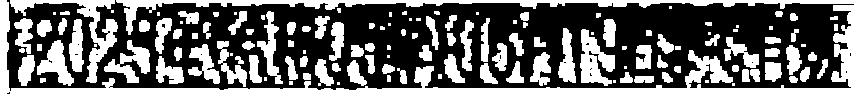

In [11]:
img2 = Image.open('./resources/img_dilate.png')
img2

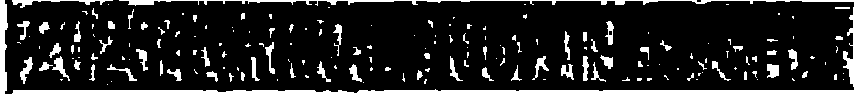

In [12]:
img3 = Image.open('./resources/img_erode.png')
img3

In [13]:
txt1 = tool.image_to_string(
    img2,
    lang='areaOcr',
    builder=pyocr.builders.TextBuilder(tesseract_layout=6)
)

In [14]:
print(txt1)

M027 中 tSRTTWRDORTTESSHS


## tesseract (areaOcr.tessdata) の確認

In [15]:
img4 = Image.open("./resources/tesseract_psm.png")

In [16]:
txt2 = tool.image_to_string(
    img4,
    lang='areaOcr',
    builder=pyocr.builders.TextBuilder(tesseract_layout=6)
)

In [17]:
print(txt2)

|Tessere オ プ シ ョ ン : ペ ー ジ セ グ メ ン テ ー シ ョ ン モ ー ド (PSM)
Tesseract に は PSM(Page Segmentation Mode) と い う レ イ ア ウ ト 解 析 も オ プ シ ョ ン が あ り 、13 の
モ ー ド が 有 必 意 さ れ て い ま す 。 デ フ ォ ル ト は 3 番 で す が 、 複 数 行 の 文 介 で あ れ ば 6 番 を 指 定 す る こ と で
精 度 の 向 上 を 見 込 め ま す 。 ま た 、 一 行 の 文 章 や 一 文 字 専 肛 。 オ プ シ ョ ン も あ る の で 、 状 況 に 応 じ て モ
ー ド を 変 え ま し ょ う 。

*0 テ キ ス ト め の 倖 角 度 や 言 語 の 種 類 を 検 知 OSD) し て 出 力

*10OSD あ り で OCR ( 回 転 し た 画 像 に も 対 応 し て OCR 可 )

*20OSD な し で テ キ ス ト め の 侍 倖 角 度 情 報 を 標 準 出 乃 OCR な し )

*3 0OSD な し で OCR( デ フ ォ ル ト の 設 定 は こ れ )

*4 単 一 別 に さ ま ざ ま な テ キ ス ト サ イ ズ が 入 り 混 じ っ た も の と 想 定 し て OCR

*5 経 書 き の ま と ま っ た 文 章 と 想 定 し て OCR

*6 横 書 き の ま と ま っ た 文 章 と 想 定 し て OCR

*? 生 - 行 の 文 章 と 想 定 し て OCR

*8 生 単 語 と 想 定 し て OCR

*9 円 の 中 に 一 単 語 が あ る 想 定 で OCR (①、② な ど )

*10- 文 字 と 想 定 し て OCR
